# 1.1 手动实现k-means均值聚类
## （1） 总体要求
使用 K-means 算法手动实现聚类，不要直接调用库函数；在任意数据集上评
估聚类结果；比较不同参数（（簇的个数数初始聚聚类心、初代次数数））对模型
性能个影响。
## （2） 实验说明
+ 自选一数真实数据集（dataset/01-True）或两数合成数据集（dataset/02-
Synthetic）；
+ 手动实现 K-means 聚类算法；
+ 若采用真实数据集，至少计算一数聚类评估指标，并比较不同参数对模型性能个影响；若采用合成数据集，分析两数合成数据集个数据分布特性，可视化比较不同参数对模型性能个影响。
+ Notebook 心需要包含关键次码注释初结果分析）内容。



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score

## 1. 手动实现 K-means 聚类算法

In [2]:
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        # 随机初始化k个中心点
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]
        
        for i in range(self.max_iters):
            # 步骤1：为每个点分配标签
            labels = self._assign_labels(X)
            
            # 步骤2：计算新的中心点
            new_centroids = self._compute_centroids(X, labels)
            
            # 步骤3：检查收敛条件
            shift = np.sum((new_centroids - self.centroids) ** 2)
            if shift < self.tol:
                print(f'Converged after {i+1} iterations')
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # 计算每个数据点到各个簇中心的距离，选择距离最近的簇中心
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _compute_centroids(self, X, labels):
        # 根据每个簇的标签计算新的簇中心
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return centroids
    
    def predict(self, X):
        # 预测每个数据点的标签
        return self._assign_labels(X)
    
    def get_centroids(self):
        return self.centroids

- **`__init__` 方法**：初始化 K-means 聚类的超参数，包括簇的个数（`k`）、最大迭代次数（`max_iters`）和收敛阈值（`tol`）。
- **`fit` 方法**：训练模型，随机选择 `k` 个初始质心，通过多次迭代更新质心，直到满足收敛条件或达到最大迭代次数。
- **`_assign_labels` 方法**：计算每个数据点到每个簇中心的距离，并为每个点分配最接近的簇标签。
- **`_compute_centroids` 方法**：根据数据点所属簇的标签计算新的簇中心。
- **`predict` 方法**：对新数据进行聚类预测。
- **`get_centroids` 方法**：获取最终的簇中心。

## 2. **数据加载与预处理**

In [3]:
df = pd.read_csv('/home/aistudio/dataset/01-True/Iris.csv')
X = df.drop(columns=['Species']).values  # 使用数值特征进行聚类
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- 通过 `pd.read_csv()` 从文件中加载 **Iris 数据集**。
- 通过 `drop(columns=['Species'])` 删除目标列（`Species`），因为该列是分类标签，而聚类算法不需要目标标签。
- 使用 `StandardScaler` 对数据进行 **标准化**，将每个特征的均值归零，方差归一，以便进行聚类分析。

## 3. **可视化原始数据**

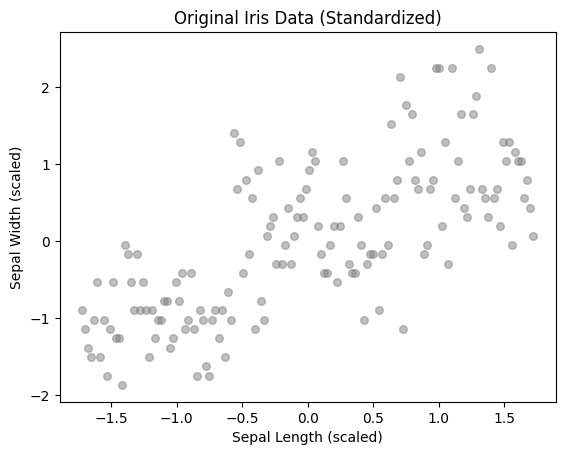

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=30, alpha=0.5)
plt.title('Original Iris Data (Standardized)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()

- 通过散点图可视化标准化后的 **Iris 数据**，只选取了前两个特征（`Sepal Length` 和 `Sepal Width`）。
- `c='gray'` 设置颜色为灰色，`alpha=0.5` 设置透明度。

## 4. **K-means 聚类**

In [6]:
kmeans = KMeans(k=3, max_iters=100)  # 选择簇的个数k=3
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
centroids = kmeans.get_centroids()

Converged after 9 iterations


- 使用 K-means 聚类算法，设定簇数 `k=3`，并进行训练。
- 训练完成后，获取聚类的标签 `labels` 和最终的簇中心 `centroids`。

## 5. 可视化聚类结果

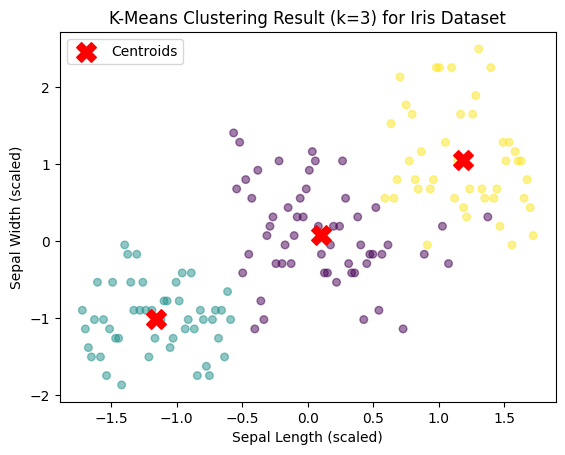

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=30, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Result (k=3) for Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()

- 可视化 **K-means 聚类结果**。数据点根据聚类标签 `labels` 用不同的颜色标记。
- 聚类的质心（`centroids`）用红色 `X` 标记显示。

## 6. **评估聚类性能**

In [9]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.4555


## 7. 比较不同簇数对聚类性能的影响

Converged after 3 iterations
k=2, Silhouette Score=0.5708, NMI=0.7337, ARI=0.5681
Converged after 9 iterations
k=3, Silhouette Score=0.4555, NMI=0.8862, ARI=0.8860
Converged after 6 iterations
k=4, Silhouette Score=0.3912, NMI=0.6784, ARI=0.6165
Converged after 8 iterations
k=5, Silhouette Score=0.4097, NMI=0.7885, ARI=0.7106
Converged after 7 iterations
k=6, Silhouette Score=0.3473, NMI=0.7542, ARI=0.6002
Converged after 6 iterations
k=7, Silhouette Score=0.3176, NMI=0.7053, ARI=0.5348
Converged after 11 iterations
k=8, Silhouette Score=0.3248, NMI=0.6837, ARI=0.5004
Converged after 7 iterations
k=9, Silhouette Score=0.3362, NMI=0.6536, ARI=0.4692


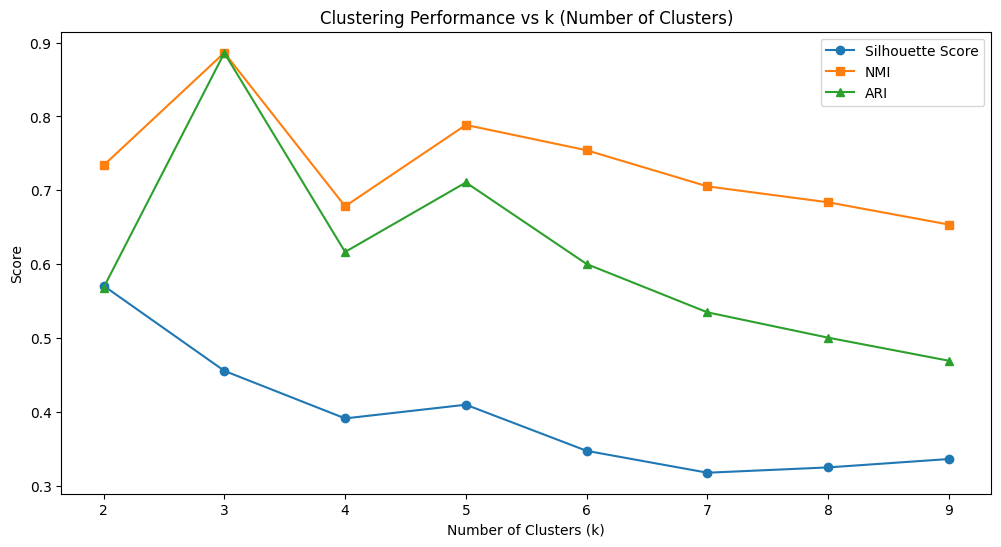

In [10]:
def evaluate_kmeans(X, y_true, k_values):
    silhouette_scores = []
    nmi_scores = []
    ari_scores = []
    
    for k in k_values:
        kmeans = KMeans(k=k, max_iters=100)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        
        # 计算评价指标
        silhouette = silhouette_score(X, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
        ari = adjusted_rand_score(y_true, labels)
        
        silhouette_scores.append(silhouette)
        nmi_scores.append(nmi)
        ari_scores.append(ari)
        
        print(f'k={k}, Silhouette Score={silhouette:.4f}, NMI={nmi:.4f}, ARI={ari:.4f}')
    
    # 绘制不同k值的评估指标变化图
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
    plt.plot(k_values, nmi_scores, marker='s', label='NMI')
    plt.plot(k_values, ari_scores, marker='^', label='ARI')
    plt.title('Clustering Performance vs k (Number of Clusters)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# 选择不同的k值来评估
evaluate_kmeans(X_scaled, y_true=df['Species'].values, k_values=[2, 3, 4, 5, 6, 7, 8, 9])

- **`evaluate_kmeans` 函数**：比较不同的簇数 `k` 对聚类效果的影响。
  - 对每个 `k`，使用 K-means 聚类算法训练模型并预测聚类标签。
  - 计算 **轮廓系数 (Silhouette Score)**、**归一化互信息 (NMI)** 和 **调整兰德指数 (ARI)** 作为评估指标。
  - 输出每个 `k` 值对应的评估指标，并通过图形显示不同 `k` 值的性能变化。

## 结果分析

### **聚类性能评估指标分析**

- **轮廓系数（Silhouette Score）**：用于衡量每个样本是否合理地被分配到对应的簇中。其值范围从 -1 到 1，值越大表示聚类效果越好。

- **归一化互信息（NMI）**：用于衡量聚类结果与真实标签之间的相似度，值越高表示聚类与真实标签的匹配度越好。NMI 的值范围是 [0, 1]，值为 1 表示完全相同。

- **调整兰德指数（ARI）**：与 NMI 类似，用于衡量聚类与真实标签之间的相似度，但它对随机聚类进行调整。ARI 的值范围是 [-1, 1]，值越大表示聚类效果越好，0 表示随机聚类。

### **各簇数的结果分析**

#### **k = 2**
- **Silhouette Score** = 0.5708：这个轮廓系数值相对较高，表示聚类效果较好。数据被分成两个簇，每个簇的内聚性较强，簇间的分离度较高。
- **NMI** = 0.7337：NMI 值较高，表示聚类结果与真实标签之间的相似度较强。尽管 k=2 可能没有完全对应数据集的实际类别数量，但聚类结果仍然与实际类别有较高的匹配度。
- **ARI** = 0.5681：ARI 值中等偏高，表示聚类结果与真实标签有一定程度的匹配，虽然比 k=3 低，但仍然表明两者之间有一定的重合。

#### **k = 3**
- **Silhouette Score** = 0.4555：这个轮廓系数值相对较低，表明聚类效果较差。尽管 3 可能是数据的真实类别数，但此时的簇间可能没有很好的分离度，部分簇可能有重叠。
- **NMI** = 0.8862：NMI 值非常高，表明聚类结果与真实标签高度一致。实际上，Iris 数据集有 3 个实际类别，所以选择 k=3 确实能较好地匹配数据集的实际情况。
- **ARI** = 0.8860：ARI 值也很高，表明 K-means 聚类与真实标签的相似度很高，结果理想。

#### **k = 4**
- **Silhouette Score** = 0.3912：轮廓系数进一步降低，表示聚类效果继续变差。使用 k=4 的聚类可能导致簇的内聚性下降，且簇间的分离度较差。
- **NMI** = 0.6784：NMI 下降，说明聚类结果与真实标签的匹配度有所降低。
- **ARI** = 0.6165：ARI 也有所下降，聚类结果与真实标签之间的匹配度较 k=3 时差一些，但仍然比随机聚类好。


### **总结与分析**

- **最佳簇数 k = 3**：k=3 是最佳的簇数。尽管轮廓系数较低，NMI 和 ARI 都显示出 k=3 与真实标签的匹配度非常高
  
- **k = 2**：虽然 NMI 和 ARI 都较高，聚类结果与真实标签有一定相似度，但轮廓系数显示聚类效果较差，表明 2 个簇并不能完全捕捉数据集的真实结构。

- **k > 3**：随着簇数的增加，轮廓系数逐渐下降，聚类效果逐渐变差。虽然 NMI 和 ARI 在 k=4 到 k=5 时略有回升，但总体上超过 3 的簇数导致了过度分割，簇内的内聚性下降，簇间的分离度减小，导致聚类效果变差。


## 完整程序

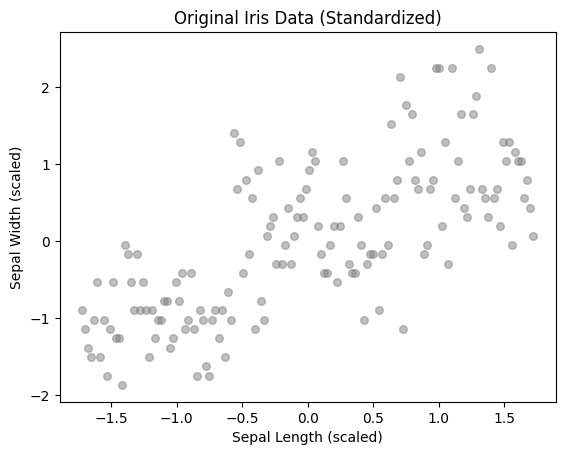

Converged after 9 iterations


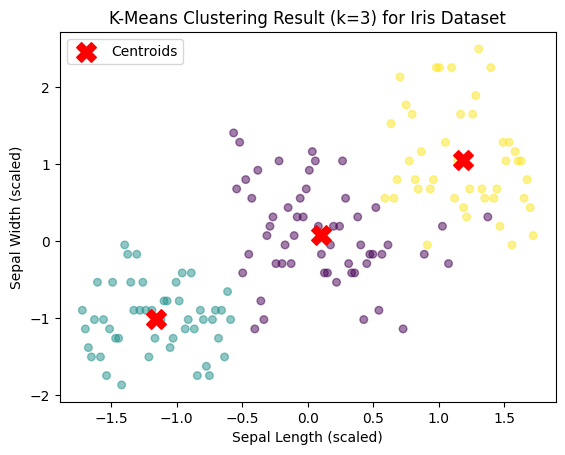

Silhouette Score: 0.4555
Converged after 3 iterations
k=2, Silhouette Score=0.5708, NMI=0.7337, ARI=0.5681
Converged after 9 iterations
k=3, Silhouette Score=0.4555, NMI=0.8862, ARI=0.8860
Converged after 6 iterations
k=4, Silhouette Score=0.3912, NMI=0.6784, ARI=0.6165
Converged after 8 iterations
k=5, Silhouette Score=0.4097, NMI=0.7885, ARI=0.7106
Converged after 7 iterations
k=6, Silhouette Score=0.3473, NMI=0.7542, ARI=0.6002
Converged after 6 iterations
k=7, Silhouette Score=0.3176, NMI=0.7053, ARI=0.5348
Converged after 11 iterations
k=8, Silhouette Score=0.3248, NMI=0.6837, ARI=0.5004
Converged after 7 iterations
k=9, Silhouette Score=0.3362, NMI=0.6536, ARI=0.4692


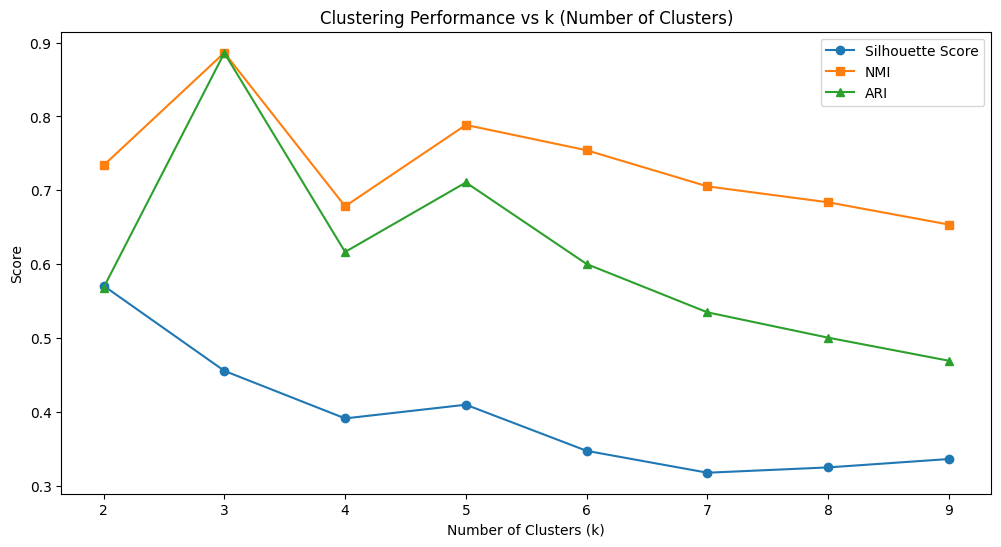

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score

# 1. 手动实现 K-means 聚类算法
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        # 随机初始化k个中心点
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]
        
        for i in range(self.max_iters):
            # 步骤1：为每个点分配标签
            labels = self._assign_labels(X)
            
            # 步骤2：计算新的中心点
            new_centroids = self._compute_centroids(X, labels)
            
            # 步骤3：检查收敛条件
            shift = np.sum((new_centroids - self.centroids) ** 2)
            if shift < self.tol:
                print(f'Converged after {i+1} iterations')
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # 计算每个数据点到各个簇中心的距离，选择距离最近的簇中心
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _compute_centroids(self, X, labels):
        # 根据每个簇的标签计算新的簇中心
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return centroids
    
    def predict(self, X):
        # 预测每个数据点的标签
        return self._assign_labels(X)
    
    def get_centroids(self):
        return self.centroids

# 2. 加载 Iris 数据集
# 请根据实际数据路径修改路径
df = pd.read_csv('/home/aistudio/dataset/01-True/Iris.csv')

# 3. 数据预处理：标准化（去除标签列 'species'）
X = df.drop(columns=['Species']).values  # 使用数值特征进行聚类

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 可视化原始数据（二维数据可视化）
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=30, alpha=0.5)
plt.title('Original Iris Data (Standardized)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()

# 5. 使用 K-means 聚类
kmeans = KMeans(k=3, max_iters=100)  # 选择簇的个数k=3
kmeans.fit(X_scaled)

# 6. 聚类结果可视化
labels = kmeans.predict(X_scaled)
centroids = kmeans.get_centroids()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=30, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Result (k=3) for Iris Dataset')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()

# 7. 评估模型性能 (使用轮廓系数)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# 8. 比较不同簇数对聚类性能的影响，包括 NMI 和 ARI
def evaluate_kmeans(X, y_true, k_values):
    silhouette_scores = []
    nmi_scores = []
    ari_scores = []
    
    for k in k_values:
        kmeans = KMeans(k=k, max_iters=100)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        
        # 计算评价指标
        silhouette = silhouette_score(X, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
        ari = adjusted_rand_score(y_true, labels)
        
        silhouette_scores.append(silhouette)
        nmi_scores.append(nmi)
        ari_scores.append(ari)
        
        print(f'k={k}, Silhouette Score={silhouette:.4f}, NMI={nmi:.4f}, ARI={ari:.4f}')
    
    # 绘制不同k值的评估指标变化图
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
    plt.plot(k_values, nmi_scores, marker='s', label='NMI')
    plt.plot(k_values, ari_scores, marker='^', label='ARI')
    plt.title('Clustering Performance vs k (Number of Clusters)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# 选择不同的k值来评估
evaluate_kmeans(X_scaled, y_true=df['Species'].values, k_values=[2, 3, 4, 5, 6, 7, 8, 9])
